In [21]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

In [22]:
EPISODES=300

In [29]:
class DQNAgent:
    def __init__(self,state_size,action_size):
        self.action_size=action_size
        self.state_size=state_size
        
        self.discount_factor=0.99
        self.learning_rate=0.001
        self.epsilon=1.0
        self.epsilon_decay=0.999
        self.epsilon_min=0.01
        self.batch_size=64
        self.train_start=1000
        
        self.memory=deque(maxlen=2000)
        self.model=self.build_model()
        self.target_model=self.build_model()
        
        self.update_target_model()
        
    def build_model(self):
        model=Sequential()
        model.add(Dense(24,input_dim=self.state_size,activation='relu',
                       kernel_initializer='he_uniform'))
        model.add(Dense(24,activation='relu',
                       kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size,activation='linear',
                       kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        return model
    
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
    
    def get_action(self,state):
        if np.random.rand()<=self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value=self.model.predict(state)
            return np.argmax(q_value[0])
    def append_sample(self,state,action,reward,next_state,done):
        self.memory.append((state,action,reward,next_state,done))
        
    def train_model(self):
        if self.epsilon>self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        mini_batch=random.sample(self.memory,self.batch_size)
        states=np.zeros((self.batch_size,self.state_size))
        next_states=np.zeros((self.batch_size,self.state_size))
        actions,rewards,dones=[],[],[]
        
        for i in range(self.batch_size):
            states[i]=mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i]=mini_batch[i][3]
            dones.append(mini_batch[i][4])
            
        target=self.model.predict(states)
        target_val=self.target_model.predict(next_states)
        
        for i in range(self.batch_size):
            if dones[i]:
                target[i][actions[i]]=rewards[i]
            else:
                target[i][actions[i]]=rewards[i]+self.discount_factor*(
                np.amax(target_val[i]))
        self.model.fit(states,target,batch_size=self.batch_size,
                      epochs=1,verbose=0)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_38 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_41 (Dense)             (None, 24)                600       
________________________________

Exception ignored in: <function Viewer.__del__ at 0x000001EDF17374C8>
Traceback (most recent call last):
  File "c:\users\박정은\gym\gym\envs\classic_control\rendering.py", line 152, in __del__
    self.close()
  File "c:\users\박정은\gym\gym\envs\classic_control\rendering.py", line 71, in close
    self.window.close()
AttributeError: 'Viewer' object has no attribute 'window'
Exception ignored in: <function Viewer.__del__ at 0x000001EDF17374C8>
Traceback (most recent call last):
  File "c:\users\박정은\gym\gym\envs\classic_control\rendering.py", line 152, in __del__
    self.close()
  File "c:\users\박정은\gym\gym\envs\classic_control\rendering.py", line 71, in close
    self.window.close()
AttributeError: 'Viewer' object has no attribute 'window'
Exception ignored in: <function Viewer.__del__ at 0x000001EDF17374C8>
Traceback (most recent call last):
  File "c:\users\박정은\gym\gym\envs\classic_control\rendering.py", line 152, in __del__
    self.close()
  File "c:\users\박정은\gym\gym\envs\classic_cont

episode: 13   score: 20.0   memory length: 254   epsilon: 1.0
episode: 14   score: 18.0   memory length: 273   epsilon: 1.0
episode: 15   score: 17.0   memory length: 291   epsilon: 1.0
episode: 16   score: 34.0   memory length: 326   epsilon: 1.0
episode: 17   score: 18.0   memory length: 345   epsilon: 1.0
episode: 18   score: 35.0   memory length: 381   epsilon: 1.0
episode: 19   score: 19.0   memory length: 401   epsilon: 1.0
episode: 20   score: 17.0   memory length: 419   epsilon: 1.0
episode: 21   score: 9.0   memory length: 429   epsilon: 1.0
episode: 22   score: 11.0   memory length: 441   epsilon: 1.0
episode: 23   score: 13.0   memory length: 455   epsilon: 1.0
episode: 24   score: 8.0   memory length: 464   epsilon: 1.0
episode: 25   score: 10.0   memory length: 475   epsilon: 1.0
episode: 26   score: 15.0   memory length: 491   epsilon: 1.0
episode: 27   score: 23.0   memory length: 515   epsilon: 1.0
episode: 28   score: 13.0   memory length: 529   epsilon: 1.0
episode: 2

SystemExit: 

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


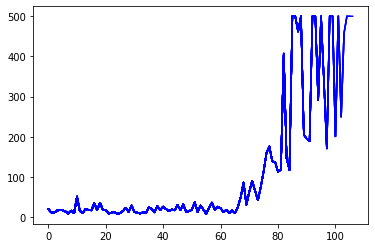

In [30]:
env=gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)
scores,episodes=[],[]

for e in range(EPISODES):
    done=False
    score=0
    
    state=env.reset()
    state=np.reshape(state,[1,state_size])
    
    while not done:
        #env.render()
        action=agent.get_action(state)
        next_state,reward,done,_=env.step(action)
        next_state=np.reshape(next_state,[1,state_size])
        reward=reward if not done or score==499 else -100
        
        agent.append_sample(state,action,reward,next_state,done)
        if len(agent.memory)>=agent.train_start:
            agent.train_model()
            
        score+=reward
        state=next_state
        
        if done:
            agent.update_target_model()
            
            score=score if score==500 else score+100
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes,scores,'b')
            print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)
            if np.mean(scores[-min(3,len(scores)):])>490:
                sys.exit()